In [1]:
import pandas as pd
import numpy as np

import zucaml.zucaml as ml

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

#### gold

In [2]:
df_gold = ml.get_csv('data/gold/', 'gold', [])

df_gold = df_gold.sort_values(['date', 'x', 'y', 'z'], ascending = [True, True, True, True])

results_grid = pd.DataFrame({}, index = [])

ml.print_memory(df_gold)
df_gold[:5]

Memory usage: 11.15 MB
106,265 x 24


,zone_frame,date,event,energy,x,y,z,energy_neighbours,target,energy|rolling.mean#30,energy|rolling.mean#90,energy|rolling.mean#180,energy|rolling.mean#330,energy|rolling.mean#360,energy_neighbours|rolling.mean#30,energy_neighbours|rolling.mean#90,energy_neighbours|rolling.mean#180,energy_neighbours|rolling.mean#330,energy_neighbours|rolling.mean#360,energy|rolling.mean#30||ratio||energy|rolling.mean#360,energy|rolling.mean#90||ratio||energy|rolling.mean#360,energy|rolling.mean#180||ratio||energy|rolling.mean#360,energy|rolling.mean#330||ratio||energy|rolling.mean#360,days.since.last
101489,-85|3|0,1973-01-02,1,6.415757e+12,-85,3,0,0.0,0,6.415757e+12,6.415757e+12,6.415757e+12,6.415757e+12,6.415757e+12,0.0,0.0,0.0,0.0,0.0000,1.0,1.0,1.0,1.0,0.0
26417,-61|-27|600,1973-01-03,1,2.013725e+13,-61,-27,600,0.0,0,2.013725e+13,2.013725e+13,2.013725e+13,2.013725e+13,2.013725e+13,0.0,0.0,0.0,0.0,0.0000,1.0,1.0,1.0,1.0,0.0
49373,-73|-27|100,1973-01-06,0,1.976971e+12,-73,-27,100,0.0,0,1.976971e+12,1.976971e+12,1.976971e+12,1.976971e+12,1.976971e+12,0.0,0.0,0.0,0.0,0.0625,1.0,1.0,1.0,1.0,NaN
87264,-73|3|200,1973-01-07,1,4.031164e+12,-73,3,200,0.0,0,4.031164e+12,4.031164e+12,4.031164e+12,4.031164e+12,4.031164e+12,0.0,0.0,0.0,0.0,0.0000,1.0,1.0,1.0,1.0,0.0
38991,-73|-17|100,1973-01-08,0,3.767042e+11,-73,-17,100,0.0,0,3.767042e+11,3.767042e+11,3.767042e+11,3.767042e+11,3.767042e+11,0.0,0.0,0.0,0.0,0.0000,1.0,1.0,1.0,1.0,NaN


#### features

In [3]:
target = 'target'
time_ref = 'date'
pid = 'zone_frame'

all_features = {

    'x': {
        'class': 'location',
        'type': 'categorical',
        'subtype': 'onehot',
        'level': 0,
    },

    'y': {
        'class': 'location',
        'type': 'categorical',
        'subtype': 'onehot',
        'level': 0,
    },

    'z': {
        'class': 'location',
        'type': 'categorical',
        'subtype': 'onehot',
        'level': 0,
    },
    
    'energy|rolling.mean#30': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#90': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#180': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#330': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#360': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },
    
    'energy_neighbours|rolling.mean#30': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy_neighbours|rolling.mean#90': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy_neighbours|rolling.mean#180': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy_neighbours|rolling.mean#330': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy_neighbours|rolling.mean#360': {
        'class': 'energy.ma',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#30||ratio||energy|rolling.mean#360': {
        'class': 'energy.ratio',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#90||ratio||energy|rolling.mean#360': {
        'class': 'energy.ratio',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#180||ratio||energy|rolling.mean#360': {
        'class': 'energy.ratio',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },

    'energy|rolling.mean#330||ratio||energy|rolling.mean#360': {
        'class': 'energy.ratio',
        'type': 'numeric',
        'subtype': 'float',
        'level': 0,
    },
    
    'days.since.last': {
        'class': 'info',
        'type': 'numeric',
        'subtype': 'int',
        'level': 0,
    },

}

discarded_features = [feat for feat in df_gold if feat not in [feat2 for feat2 in all_features] + [target, time_ref, pid]]
onehot_features = [feat for feat in all_features if all_features[feat]['type'] == 'categorical' and all_features[feat]['subtype'] == 'onehot']

print('Total features\t\t ' + str(len(all_features)))
if len(discarded_features) > 0:
    print('Discarded features\t ' + str(len(discarded_features)) + '\t\t' + str(discarded_features))
print('Numerical features\t ' + str(sum([all_features[i]['type'] == 'numeric' for i in all_features])))
print('Categorical features\t ' + str(sum([all_features[i]['type'] == 'categorical' for i in all_features])))
if len(onehot_features) > 0:
    print('One-hot features\t ' + str(len(onehot_features)) + '\t\t' + str(onehot_features))

Total features		 18
Discarded features	 3		['event', 'energy', 'energy_neighbours']
Numerical features	 15
Categorical features	 3
One-hot features	 3		['x', 'y', 'z']


#### Problem

In [4]:
this_problem = ml.problems.BINARY
metrics = ['F0.5', 'precision', 'recall', 'roc_auc']

#### split train test

In [5]:
df_train, df_test = ml.split_by_time_ref(df_gold, 0.88, target, time_ref, this_problem, True)

     Total	Total perc	   Balance	    Events	
    95,181	       90%	     6.95%	     6,612	
    11,084	       10%	     8.46%	       938	


#### model

In [6]:
level_0_features = [feat for feat in all_features if all_features[feat]['level'] == 0]
level_0_features_numeric = [feat for feat in level_0_features if feat not in onehot_features]
level_0_features_onehot = [feat for feat in level_0_features if feat in onehot_features]

level_0_features_energy_ma = [feat for feat in level_0_features if all_features[feat]['class'] == 'energy.ma']
level_0_features_energy_ratio = [feat for feat in level_0_features if all_features[feat]['class'] == 'energy.ratio']

number_categorical_onehot = df_train['x'].nunique() + df_train['y'].nunique() + df_train['z'].nunique()

level_0_features_numeric_clip = [feat for feat in level_0_features_numeric if df_train[feat].abs().max() == np.inf]
level_0_features_numeric_not_clip = [feat for feat in level_0_features_numeric if feat not in level_0_features_numeric_clip]

level_0_features_location = [feat for feat in all_features if all_features[feat]['level'] == 0 and all_features[feat]['class'] == 'location']

In [7]:
%%time

# ##########################
# # linear models
# ##########################

lin_basic_config = {
    'features': level_0_features,
    'target': target,
    'family': ml.lin(this_problem),
    'algo': {
        'penalty': 'l2',
        'class_weight': 'balanced',
    },
    'preprocess': {
        'original': {
            'features': level_0_features,
            'transformer': ['filler', 'clipper', 'standard_scaler'],
        },
    },
}

lin_params = {
    'algo:C' : [0.01, 0.1, 1.0],
    'algo:solver': ['lbfgs', 'newton-cg'],
    'preprocess:iforest': [None,
        {
            'features': level_0_features,
            'transformer': ['filler', 'clipper', 'iforest_score'],
        },
    ],
    'preprocess:kmeans': [None,
        {
            'features': [feat for feat in level_0_features if all_features[feat]['type'] == 'numeric' or all_features[feat]['subtype'] == 'bool'],
            'transformer': ['filler', 'clipper', 'kmeans_distances'],
        },
    ],
}

# ##########################
# # rft models
# ##########################

rft_basic_config = {
    'features': level_0_features,
    'target': target,
    'family': ml.rft(this_problem),
    'algo': {
        'criterion': 'entropy',
        'class_weight': 'balanced',
    },
    'preprocess': {
        'original': {
            'features': level_0_features,
            'transformer': ['filler', 'clipper'],
        },
    },
}

rft_params = {
    'algo:max_depth': [6, 7, 8],
    'algo:n_estimators': [25, 50, 75, 100, 150],
    'preprocess:iforest': [None,
        {
            'features': level_0_features,
            'transformer': ['filler', 'clipper', 'iforest_score'],
        },
    ],
    'preprocess:kmeans': [None,
        {
            'features': [feat for feat in level_0_features if all_features[feat]['type'] == 'numeric' or all_features[feat]['subtype'] == 'bool'],
            'transformer': ['filler', 'clipper', 'kmeans_distances'],
        },
    ],
}

# ##########################
# # xgb models
# ##########################

xgb_basic_config = {
    'features': level_0_features,
    'target': target,
    'family': ml.xgb(this_problem),
    'algo': {
        'criterion': 'entropy',
        'scale_pos_weight': 'balanced',
    },
    'preprocess': {
        'original': {
            'features': level_0_features,
            'transformer': ['filler', 'clipper'],
        },
    },
}

xgb_params = {
    'algo:max_depth': [5, 6, 7],
    'algo:n_estimators': [15, 25, 35],
    'preprocess:iforest': [None,
        {
            'features': level_0_features,
            'transformer': ['filler', 'clipper', 'iforest_score'],
        },
    ],
    'preprocess:kmeans': [None,
        {
            'features': [feat for feat in level_0_features if all_features[feat]['type'] == 'numeric' or all_features[feat]['subtype'] == 'bool'],
            'transformer': ['filler', 'clipper', 'kmeans_distances'],
        },
    ],
}

# ##########################
# # search
# ##########################

basic_configs_and_params = []
basic_configs_and_params.append((lin_basic_config, lin_params))
basic_configs_and_params.append((rft_basic_config, rft_params))
basic_configs_and_params.append((xgb_basic_config, xgb_params))

grid_board, best_model = ml.grid_search(
    train = df_train,
    target = target,
    time_ref = time_ref,
    problem = this_problem,
    metrics = metrics,
    cv_strategy = ml.cv_strategies.TIME,
    k_fold = 3,
    percentage_test = 0.1,
    basic_configs_and_params = basic_configs_and_params,
)

grid_board.sort_values(metrics[0], ascending = False).style.format(ml.results_format)

[19:43:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "criterion", "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "criterion", "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "criterion", "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or so

,F0.5,Overfit,Precision,Recall,Roc_Auc,family,penalty,class_weight,C,solver,preprocess,time,criterion,max_depth,n_estimators
058f106bf2107ceee1fd524b9a15a20a,35%,4%,37%,29%,0.852197,xgb BINARY,nan,11.092511013215859,nan,nan,original filler > clipper | iforest filler > clipper > iforest_score | kmeans filler > clipper > kmeans_distances,0.000000,entropy,5,15
3fe7025da8ea996b1064befd33e4633b,34%,4%,38%,24%,0.852122,xgb BINARY,nan,11.092511013215859,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,5,15
b46b98502cb9c08437d232d02d1b0507,34%,5%,35%,33%,0.853439,rft BINARY,nan,balanced,nan,nan,original filler > clipper,0.000000,entropy,7,50
89458edb0599b9af91f03915337d2045,33%,4%,37%,26%,0.854510,rft BINARY,nan,balanced,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,6,150
f959f78663c2a2740fe6ab32d2dd0880,33%,4%,36%,29%,0.854937,rft BINARY,nan,balanced,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,6,25
2af83fd4ec32583a17b0d640ab173e26,33%,5%,35%,28%,0.853708,rft BINARY,nan,balanced,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,6,50
64f25e54d5840fd1ba5bc1438b197a38,33%,10%,34%,29%,0.845223,xgb BINARY,nan,11.092511013215859,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,7,15
0452bc888b2d944953ceed5a9169fede,33%,6%,34%,29%,0.853989,rft BINARY,nan,balanced,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,7,50
f431fdeba7f9c11aca6c7e4ab2d086ff,33%,10%,35%,27%,0.834718,xgb BINARY,nan,11.092511013215859,nan,nan,original filler > clipper,0.000000,entropy,7,15
3ba302f25f917a896f4aa89a7b4d2767,32%,7%,35%,26%,0.842844,xgb BINARY,nan,11.092511013215859,nan,nan,original filler > clipper | kmeans filler > clipper > kmeans_distances,0.000000,entropy,6,15


In [8]:
label, results, register, model, final_features = ml.train_score_model(best_model, df_train, df_test, metrics)

ml.results_add_all(results_grid, label, results, register)

results_grid.style.format(ml.results_format)

[19:45:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "criterion", "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




,F0.5,Overfit,Threshold,Precision,Recall,Roc_Auc,family,criterion,class_weight,max_depth,n_estimators,preprocess,time
5390f2dc404cbe0cd01427a938160354,38%,-1%,81%,38%,40%,0.835625,xgb BINARY,entropy,11.092511013215859,5,15,original filler > clipper | iforest filler > clipper > iforest_score | kmeans filler > clipper > kmeans_distances,0.000000


In [9]:
importances_groups = {
    '|kmeans': 'sum',
}

ml.plot_features_importances(model, final_features, importances_groups, True, False)

Group: |kmeans - features: 2 - raw features: 10
34% 	 energy|rolling.mean#30
26% 	 energy|rolling.mean#330
9% 	 energy|rolling.mean#360
6% 	 distance|kmeans
4% 	 z
4% 	 energy|rolling.mean#180
3% 	 energy|rolling.mean#90
2% 	 y
2% 	 x
2% 	 energy_neighbours|rolling.mean#330
1% 	 energy|rolling.mean#30||ratio||energy|rolling.mean#360
1% 	 days.since.last
1% 	 energy|rolling.mean#180||ratio||energy|rolling.mean#360
1% 	 energy_neighbours|rolling.mean#180
1% 	 energy|rolling.mean#90||ratio||energy|rolling.mean#360
1% 	 energy_neighbours|rolling.mean#360
1% 	 energy|rolling.mean#330||ratio||energy|rolling.mean#360
1% 	 energy_neighbours|rolling.mean#30
1% 	 iforest_score
1% 	 energy_neighbours|rolling.mean#90
0% 	 cluster|kmeans


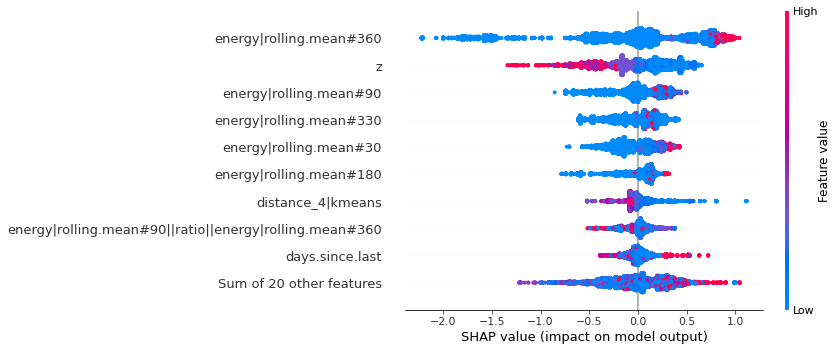

In [10]:
shap_values = ml.get_shap_values(df_test[level_0_features], model, None)

ml.plot_beeswarm(shap_values, final_features)

In [11]:
residuals = ml.get_residuals(df_test, level_0_features, target, model, results['Threshold'])

In [12]:
residuals['tp'].sum(), residuals['fp'].sum(), residuals['fn'].sum()

(376, 614, 562)

In [15]:
notes = {}

notes['number_features'] = len(level_0_features)

for name_df, df in {'train': df_train, 'test': df_test}.items():

    notes[name_df + '_lenght'] = len(df)
    notes[name_df + '_balance'] = df[target].sum() / len(df)
    notes[name_df + '_number_id'] = df[pid].nunique()
    notes[name_df + '_number_time'] = df[time_ref].nunique()
    notes[name_df + '_min_time'] = df[time_ref].min().strftime("%Y%m%d")
    notes[name_df + '_max_time'] = df[time_ref].max().strftime("%Y%m%d")
    
    for feature in ['x', 'y', 'z']:
        notes[name_df + '_' + feature] = list(np.sort(df[feature].unique().astype(str)))

ml.save_model(model, label, results, df_train, notes)